In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
dip = pd.read_csv('podatki/OpenscienceMetadata.csv',sep='|',encoding='utf_16', on_bad_lines='skip',low_memory=False)

In [3]:
dip

,ID,UDC,Typology,Language,Title,Subtitle,Abstract,Keywords,AlternativeLanguage,AlternativeTitle,AlternativeSubtitle,AlternativeAbstract,AlternativeKeywords,IssueYear,URL,OrganizationID_COBISS,OrganizationID_eVS,COBISSID,NRID
0,499290,54:547.913(043.2),2.11,slv,Mikrokapsuliranje eteričnih olj s koacervacijs...,diplomsko delo,Mikrokapsuliranje eteričnih olj s koacervacijs...,mikrokapsule;kompleksna koacervacija;želatina;...,eng,Microencapsulation of essential oils by coacer...,NaN,"In the diploma work, a simplified procedure ha...",chemistry,2014.0,http://pefprints.pef.uni-lj.si/id/eprint/2403,3-117,74.0,10198601.0,8678266.0
1,499590,376:159.922.76-056.45(043.2),2.11,slv,Strategije dela s socialno slabše prilagojenim...,diplomsko delo,Strategije dela s socialno slabše prilagojenim...,osnovna šola;socialna prilagojenost;osnovnošol...,eng,Strategies for working with socially disabled ...,NaN,My diploma thesis is focused on population of ...,gifted pupils,2014.0,http://pefprints.pef.uni-lj.si/id/eprint/2383,3-117,74.0,10181193.0,8678246.0
2,499594,316.454.7:792(043.2),2.11,slv,Socialno-kulturna animacija kot metoda dela v ...,diplomsko delo,Socialno-kulturna animacija kot metoda dela v ...,socialna pedagogika;forum gledališče;animatorji;,eng,Socio-cultural animation as a method of work i...,NaN,The diploma work presents socio-cultural anima...,socio-cultural animation,2014.0,http://pefprints.pef.uni-lj.si/id/eprint/2173,3-117,74.0,10074441.0,8328046.0
3,499657,379.8:364.4-053.6(043.2),2.11,slv,Potreba po mladinskem centru v občini Cerknica,diplomsko delo,Potreba po mladinskem centru v občini Cerknica,mladi;potrebe mladih;občina Cerknica;mladinski...,eng,The need for a youth center in the municipalit...,NaN,In the thesis I explore the need for a youth c...,youth center,2014.0,http://pefprints.pef.uni-lj.si/id/eprint/2363,3-117,74.0,10172745.0,8678228.0
4,499843,376:37.013.42(043.2),2.11,slv,Analiza intervencij pri obravnavi otroka z odl...,diplomsko delo,Analiza intervencij pri obravnavi otroka z odl...,vedenjska problematika;dodatna strokovna pomoč...,eng,Analysis of intervention in the treatment of c...,NaN,According to the new concept of upbringing and...,school,2014.0,http://pefprints.pef.uni-lj.si/id/eprint/2432,3-117,74.0,10209353.0,8678291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131750,3827623,91:37,2.11,slv,Uvajanje in uporaba interaktivnih učnih gradiv...,diplomsko delo,Uvajanje in uporaba interaktivnih učnih gradiv...,diplomska dela;geografske diplome;šolska geogr...,eng,NaN,NaN,NaN,geographical education;textbooks;interactive t...,2016.0,https://repozitorij.uni-lj.si/IzpisGradiva.php...,3-114,71.0,61674594.0,9239290.0
131751,4151507,616-07,2.09,slv,Sistem za avtomatsko detekcijo artefaktov na m...,magistrsko delo,Uvod: Odkrivanje raznovrstnih artefaktov na sl...,magistrska dela;radiološka tehnologija;detekci...,eng,Automated artifact detection in uniform mammog...,NaN,Introduction: Detection of various artifacts i...,master's theses;radiologic technology;artifact...,2019.0,https://repozitorij.uni-lj.si/IzpisGradiva.php...,3-123,78.0,5698667.0,11233692.0
131752,4146096,616.31,2.11,slv,Korozijska odpornost titanovih vsadkov z nanos...,diplomsko delo,Uvod: Titan in njegove zlitine so trenutno naj...,diplomska dela;laboratorijska zobna protetika;...,eng,Corrosion resistance of titanium implants with...,NaN,Introduction: Titanium and its alloys are curr...,diploma theses;laboratory dental prosthetics;t...,2019.0,https://repozitorij.uni-lj.si/IzpisGradiva.php...,3-123,78.0,5697643.0,11232995.0
131753,4148976,615.8,2.11,slv,Merske lastnosti testa devetih zatičev pri pac...,diplomsko delo,Uvod: Pri pacientih z multiplo sklerozo in pac...,diplomska dela;fizioterapija;test devetih zati...,eng,Measurement properties of nine hole peg test i...,NaN,Introduction: In patients with multiple sclero...,diploma theses;physiotherapy;nine hole peg tes...,2019.0,https://repozitorij.uni-lj.si/IzpisGradi

In [4]:
aut = pd.read_csv('podatki/OpenScienceMetadataAuthors.csv',sep='|',encoding='utf_16', on_bad_lines='warn',low_memory=False)
aut1 = aut.set_index('Name')

In [5]:
aut.groupby("AuthorID").count()

,MetadataID,Name,Surname
AuthorID,,,
10,5,5,5
11,1,1,1
18,1,1,1
19,13,13,13
21,2,2,2
...,...,...,...
5033173,1,1,1
5033174,1,1,1
5033175,1,1,1


In [6]:
aut1
print(aut1.loc['Anamarina'].to_string())

MetadataID    1189509
AuthorID       788909
Surname        Ljubić


In [7]:
#https://archive.ics.uci.edu/ml/datasets/Gender+by+Name
#dataset globalnih imen
name = pd.read_csv('podatki/name_gender_dataset.csv',sep=',',encoding='utf_8_sig', on_bad_lines='warn',low_memory=False).drop(['Probability'], axis = 1)
name = name.drop_duplicates(subset=['Name'],keep='first')#ime ki ima vec pojavitev pri dolocenem spolu ostane
name = name.set_index('Name')

In [8]:
m = pd.read_csv('podatki/moska_imena.csv',sep=' ',encoding='cp1250')
z = pd.read_csv('podatki/zenska_imena.csv',sep=' ',encoding='cp1250')

In [9]:
name.loc['A']

Gender    F
Count     2
Name: A, dtype: object

## SLO + en name dataset

In [10]:
mos = m.IME.values
zen = z.IME.values
glob = name.index.values
imena = aut.groupby('Name').count().drop(['MetadataID','AuthorID'], axis = 1).rename(columns={"Surname":"Spol"})
for index, row in imena.iterrows():
    ime = index.replace('-',' ').strip().split(' ')
    if ime[0] in mos:
        imena.at[index,'Spol'] = 'M'
    elif ime[0] in zen:
        imena.at[index,'Spol'] = 'F'
    else:
        if ime[0] in glob:
            imena.at[index,'Spol'] = name.loc[ime[0],"Gender"]
        else:
            imena.at[index,'Spol'] = 'O'

In [11]:
imena
imena.assign(count=0).groupby('Spol').count()
#imena.to_csv('podatki/imena.csv')

,count
Spol,
F,2924
M,3658
O,1482


## Facebook leak

In [12]:
from names_dataset import NameDataset
nd = NameDataset()

In [13]:
print(nd.search("Amal"))

{'first_name': {'country': {'Algeria': 0.036, 'Egypt': 0.313, 'Israel': 0.019, 'Jordan': 0.03, 'Lebanon': 0.027, 'Morocco': 0.293, 'Palestine, State of': 0.023, 'Saudi Arabia': 0.097, 'Syrian Arab Republic': 0.049, 'Tunisia': 0.113}, 'gender': {'Female': 0.924, 'Male': 0.076}, 'rank': {'Algeria': 245, 'Egypt': 104, 'Israel': 143, 'Jordan': 47, 'Lebanon': 26, 'Morocco': 49, 'Palestine, State of': 42, 'Saudi Arabia': 153, 'Syrian Arab Republic': 84, 'Tunisia': 28}}, 'last_name': {'country': {'Algeria': 0.108, 'Egypt': 0.106, 'France': 0.014, 'Iraq': 0.014, 'Italy': 0.015, 'Morocco': 0.503, 'Malaysia': 0.017, 'Saudi Arabia': 0.057, 'Syrian Arab Republic': 0.021, 'Tunisia': 0.146}, 'gender': {}, 'rank': {'Algeria': 336, 'Egypt': 1814, 'France': 6083, 'Iraq': 3934, 'Italy': 13786, 'Morocco': 59, 'Malaysia': 2717, 'Saudi Arabia': 1891, 'Syrian Arab Republic': 1373, 'Tunisia': 136}}}


In [14]:
imena1 = aut.groupby('Name').count().drop(['MetadataID','AuthorID'], axis = 1).rename(columns={"Surname":"Spol"})
for index, row in imena.iterrows():
    ime = index.replace('-',' ').strip().split(' ')
    i = nd.search(ime[0])
    if i['first_name'] != None:
        if "Male" in i['first_name']['gender'] and i['first_name']['gender']['Male']>0.5:
            imena1.at[index,'Spol'] = 'M'
        else:
            imena1.at[index,'Spol'] = 'F'
    else:
        imena1.at[index,'Spol'] = 'O'

In [15]:
imena1
imena1.assign(count=0).groupby('Spol').count()
#imena1.to_csv('podatki/imena1.csv')

,count
Spol,
F,3246
M,4117
O,701


## Facebook + SLO +en dataset

In [16]:
imena2 = aut.groupby('Name').count().drop(['MetadataID','AuthorID'], axis = 1).rename(columns={"Surname":"Spol"})
for index, row in imena.iterrows():
    ime = index.replace('-',' ').strip().split(' ')
    i = nd.search(ime[0])
    if i['first_name'] != None:
        if "Male" in i['first_name']['gender'] and i['first_name']['gender']['Male']>0.5:
            imena2.at[index,'Spol'] = 'M'
        else:
            imena2.at[index,'Spol'] = 'F'
    else:
        if ime[0] in mos:
            imena2.at[index,'Spol'] = 'M'
        elif ime[0] in zen:
            imena2.at[index,'Spol'] = 'F'
        else:
            if ime[0] in glob:
                imena2.at[index,'Spol'] = name.loc[ime[0],"Gender"]
            else:
                imena2.at[index,'Spol'] = 'O'

In [17]:
imena2
imena2.assign(count=0).groupby('Spol').count()
#imena2.to_csv('podatki/imena2.csv')

,count
Spol,
F,3321
M,4230
O,513


## povezava z deli

In [18]:
def gender(x):
    return imena2.loc[x]
aut.assign(Name='n')
aut
aut=aut.dropna(subset=['Name'])
aut['Gender'] = aut['Name'].apply(gender)

In [19]:
dip = dip[dip.ID.apply(lambda x: x.isnumeric())]
dip = dip.astype({"ID": int}).sort_values("ID")

In [20]:
skup = aut.set_index('MetadataID').join(dip.set_index('ID'), how='inner')

In [21]:
#skup.drop(['Abstract','Subtitle','AlternativeTitle','AlternativeSubtitle','AlternativeAbstract'],axis=1).to_csv('podatki/stis_pod.csv')
skup.columns

Index(['AuthorID', 'Name', 'Surname', 'Gender', 'UDC', 'Typology', 'Language',
       'Title', 'Subtitle', 'Abstract', 'Keywords', 'AlternativeLanguage',
       'AlternativeTitle', 'AlternativeSubtitle', 'AlternativeAbstract',
       'AlternativeKeywords', 'IssueYear', 'URL', 'OrganizationID_COBISS',
       'OrganizationID_eVS', 'COBISSID', 'NRID'],
      dtype='object')

Greš čez vsako nalogo, šteješ pojavitev keyworda, skupno in za spol, katerega je avtor naloge. Iz skupnega štetja, sortirano od največkrat pojavlenga, bi moglo pridt gor te splošne stvari, diplomska naloga itd, in pol ostanejo dejanske teme in področja. Pogosti keywordi bi se mogli najdt pri obeh spolih, in potem izpišeš razmerje med pojavitvami pri moških : ženskah, za skupne keyworde. Če ni skupnega, bi se moglo pa preverit zakaj ne, a je čist 1 spolna tema, ali je neka napaka pri vnosih.

In [132]:
M = defaultdict(int)
F = defaultdict(int)
O = defaultdict(int)
spo = {"M":M,"F":F,"O":O}

In [133]:
for index, row in skup.iterrows():
    for word in row["Keywords"].split(";"):
        spo[row["Gender"]][word] += 1

In [134]:
raz1 = dict()

for mo, m in spo['M'].copy().items():
    raz1[mo] = (m/(m + spo['F'][mo]), spo['F'][mo]/(m + spo['F'][mo]), (m + spo['F'][mo])) #(M,F, m+f pojavitve)
    
for wo, w in spo['F'].copy().items():
    raz1[wo] = (spo['M'][wo]/(w + spo['M'][wo]), w/(w + spo['M'][wo]), (w + spo['M'][wo])) #(M,F, m+f pojavitve)
    

In [135]:
#izbrisi vse ki imajo manj kot 5 pojavitev
for key, value in spo['F'].copy().items():
    if value < 100:
        spo['F'].pop(key)
        if key in spo['M']:
            spo['M'].pop(key)

for key, value in spo['M'].copy().items():
    if value < 100:
        spo['M'].pop(key)
        if key in spo['F']:
            spo['F'].pop(key)

In [136]:
raz = dict()

for mo, m in spo['M'].copy().items():
    raz[mo] = (m/(m + spo['F'][mo]), spo['F'][mo]/(m + spo['F'][mo]), (m + spo['F'][mo])) #(M,F, m+f pojavitve)
    
for wo, w in spo['F'].copy().items():
    raz[wo] = (spo['M'][wo]/(w + spo['M'][wo]), w/(w + spo['M'][wo]), (w + spo['M'][wo])) #(M,F, m+f pojavitve)
    

In [137]:
#odstranimo splosne kljucne besede
bes = ['','diplomske naloge','diplomska dela','magistrska dela','magistrske naloge','Diplomske naloge','Diplomska dela',
       'UNI','diplomska naloga',"VSŠ"]
for b in bes:
    raz.pop(b)

In [138]:
male = dict()
fem = dict()
top = dict()
#male
malek = sorted(raz, key=raz.get, reverse=True)
for w in malek:
    male[w] = raz[w]
#female
femk = sorted(raz,key=lambda x:raz.get(x)[1:] , reverse=True)
for w in femk:
    fem[w] = raz[w]
#top 
topk = sorted(raz,key=lambda x:raz.get(x)[-1] , reverse=True)
for w in topk:
    top[w] = raz[w]    

In [147]:
#fem #(M,F,pojavitve)

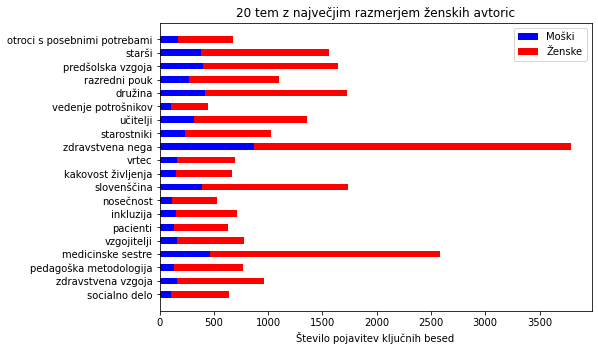

In [140]:
x = femk[:20]
y0 = [fem[a][0]*fem[a][2] for a in x]
y1 = [fem[a][1]*fem[a][2] for a in x]
y2 = [fem[a][2] for a in x]

ind = np.arange(len(x))
width = 0.50
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(ind, y0, width, color='b')
ax.barh(ind, y1, width,left=y0, color='r')

ax.set_xlabel('Število pojavitev ključnih besed')
ax.set_title('20 ključnih besed z največjim razmerjem ženskih avtoric nad 100 pojavitev')
ax.set_yticks(ind, x)

ax.legend(labels=['Moški', 'Ženske'])
plt.show()

In [145]:
#male #(M,F,pojavitve)

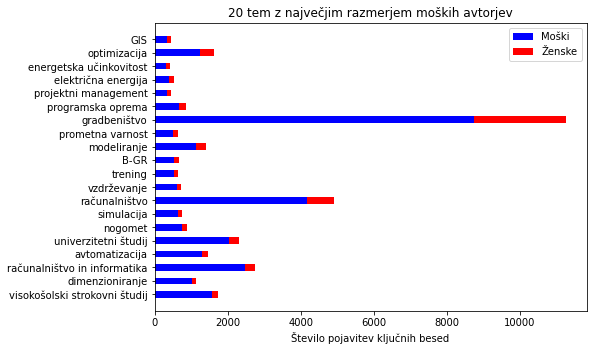

In [142]:
x = malek[:20]
y0 = [fem[a][0]*fem[a][2] for a in x]
y1 = [fem[a][1]*fem[a][2] for a in x]
y2 = [fem[a][2] for a in x]

ind = np.arange(len(x))
width = 0.50
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(ind, y0, width, color='b')
ax.barh(ind, y1, width,left=y0, color='r')

ax.set_xlabel('Število pojavitev ključnih besed')
ax.set_title('20 ključnih besed z največjim razmerjem moških avtorjev nad 100 pojavitev')
ax.set_yticks(ind, x)

ax.legend(labels=['Moški', 'Ženske'])
plt.show()

In [146]:
#top #(M,F,pojavitve)

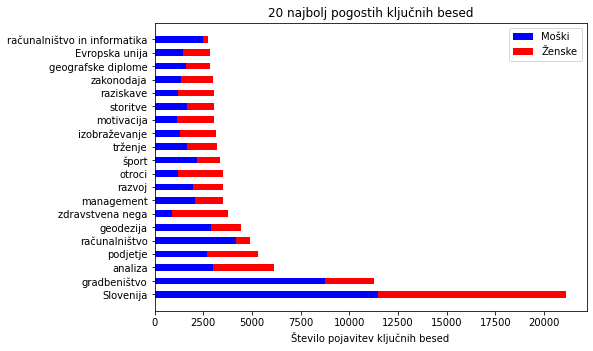

In [144]:
x = topk[:20]
y0 = [fem[a][0]*fem[a][2] for a in x]
y1 = [fem[a][1]*fem[a][2] for a in x]
y2 = [fem[a][2] for a in x]

ind = np.arange(len(x))
width = 0.50
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(ind, y0, width, color='b')
ax.barh(ind, y1, width,left=y0, color='r')

ax.set_xlabel('Število pojavitev ključnih besed')
ax.set_title('20 najbolj pogostih ključnih besed')
ax.set_yticks(ind, x)

ax.legend(labels=['Moški', 'Ženske'])
plt.show()

In [152]:


#male
omk = sorted(raz1, key=raz1.get, reverse=True)

#female
ofk = sorted(raz1,key=lambda x:raz1.get(x)[1:] , reverse=True)


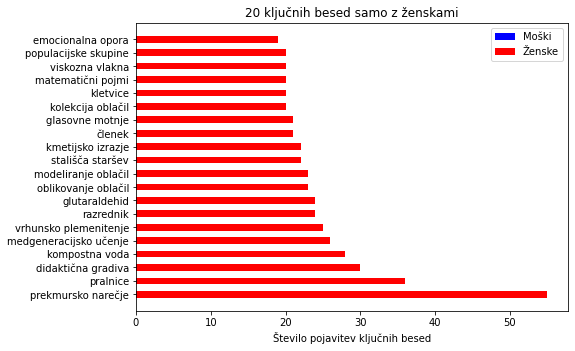

In [161]:
x = ofk[:20]
y0 = [raz1[a][0]*raz1[a][2] for a in x]
y1 = [raz1[a][1]*raz1[a][2] for a in x]
y2 = [raz1[a][2] for a in x]

ind = np.arange(len(x))
width = 0.50
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(ind, y0, width, color='b')
ax.barh(ind, y1, width,left=y0, color='r')

ax.set_xlabel('Število pojavitev ključnih besed')
ax.set_title('20 ključnih besed samo z ženskami')
ax.set_yticks(ind, x)

ax.legend(labels=['Moški', 'Ženske'])
plt.show()

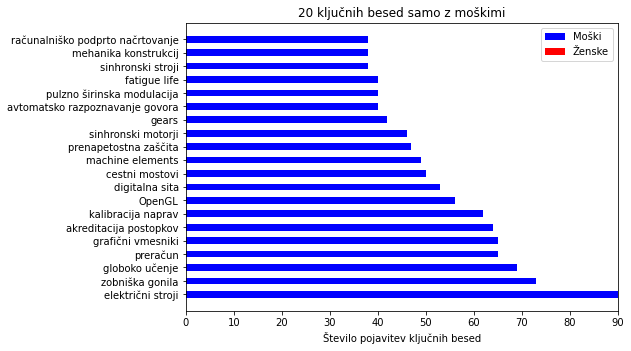

In [160]:
x = omk[:20]
y0 = [raz1[a][0]*raz1[a][2] for a in x]
y1 = [raz1[a][1]*raz1[a][2] for a in x]
y2 = [raz1[a][2] for a in x]

ind = np.arange(len(x))
width = 0.50
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(ind, y0, width, color='b')
ax.barh(ind, y1, width,left=y0, color='r')

ax.set_xlabel('Število pojavitev ključnih besed')
ax.set_title('20 ključnih besed samo z moškimi')
ax.set_yticks(ind, x)

ax.legend(labels=['Moški', 'Ženske'])
plt.show()